# Set up

### Import các thư viện cần thiết

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
import xgboost as xgb

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Đưa data vào các DataFrame

In [9]:
df_application_train = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\application_train.csv')


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\394887958.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_application_train = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\application_train.csv')


In [10]:
df_application_test = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\application_test.csv')


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\2934489327.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_application_test = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\application_test.csv')


In [11]:
df_bureau = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\bureau.csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\2421425620.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_bureau = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\bureau.csv')


In [12]:
df_POS_CASH_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\POS_CASH_balance.csv')
df_credit_card_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\credit_card_balance.csv')

df_installments_payments = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\installments_payments.csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\1304363604.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_POS_CASH_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\POS_CASH_balance.csv')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\1304363604.py:2: SyntaxWarning: invalid escape sequence '\A'
  df_credit_card_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\credit_card_balance.csv')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\1304363604.py:4: SyntaxWarning: invalid escape sequence '\A'
  df_installments_payments = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\installments_payments.csv')


In [13]:
df_previous_application = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\previous_application.csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\681833647.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_previous_application = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\previous_application.csv')


In [14]:
df_bureau_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\bureau_balance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\4121445256.py:1: SyntaxWarning: invalid escape sequence '\A'
  df_bureau_balance = pd.read_csv('C:\\Users\ADMIN\Downloads\\Credit Default\\bureau_balance.csv')


# Data exploring, cleaning and processing

### Xây dựng hàm để tìm hiểu về dữ liệu

Hàm in ra các giá trị khác nhau tại mỗi cột của các table

In [15]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Attribute '{column}': {unique_values}")

### Tìm hiểu về table chính được sử dụng

In [16]:
df_application_train.shape[1]

122

In [17]:
df_application_test.shape[1]

121

In [18]:
df_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_application_train_target = df_application_train.iloc[:, :2]

In [20]:
set(df_application_train.columns) - set(df_application_test.columns)

{'TARGET'}

In [21]:
df_application_train.shape[0]

307511

Chỉ giữ lại 46 cột đầu vì theo em nó quan trọng, các cột sau có thể gây nhiễu

In [22]:
df_application_train = df_application_train.iloc[:, :46]

In [23]:
df_application_train.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                    0.659908
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [24]:
df_application_train = df_application_train.loc[:, df_application_train.isnull().mean() <= 0.1]

In [25]:
df_application_train.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [26]:
df_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,MONDAY,11,0,0,0,0,0,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,MONDAY,9,0,0,0,0,0,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738


In [27]:
df_application_train.apply(lambda col: col.unique())

SK_ID_CURR                     [100002, 100003, 100004, 100006, 100007, 10000...
TARGET                                                                    [1, 0]
NAME_CONTRACT_TYPE                                 [Cash loans, Revolving loans]
CODE_GENDER                                                          [M, F, XNA]
FLAG_OWN_CAR                                                              [N, Y]
FLAG_OWN_REALTY                                                           [Y, N]
CNT_CHILDREN                   [0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,...
AMT_INCOME_TOTAL               [202500.0, 270000.0, 67500.0, 135000.0, 121500...
AMT_CREDIT                     [406597.5, 1293502.5, 135000.0, 312682.5, 5130...
AMT_ANNUITY                    [24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2...
AMT_GOODS_PRICE                [351000.0, 1129500.0, 135000.0, 297000.0, 5130...
NAME_TYPE_SUITE                [Unaccompanied, Family, Spouse, partner, Child...
NAME_INCOME_TYPE            

In [28]:
le = LabelEncoder()
df_previous_application_norm = df_previous_application

is_Category = df_previous_application_norm.dtypes == object

category_column_list = df_previous_application_norm.columns[is_Category].tolist()

df_previous_application_norm[category_column_list] = df_previous_application_norm[category_column_list].apply(lambda col: le.fit_transform(col))

In [29]:
df_application_train_norm = df_application_train
is_Category = df_application_train_norm.dtypes == object

category_column_list = df_application_train.columns[is_Category].tolist()

df_application_train_norm[category_column_list] = df_application_train_norm[category_column_list].apply(lambda col: le.fit_transform(col))

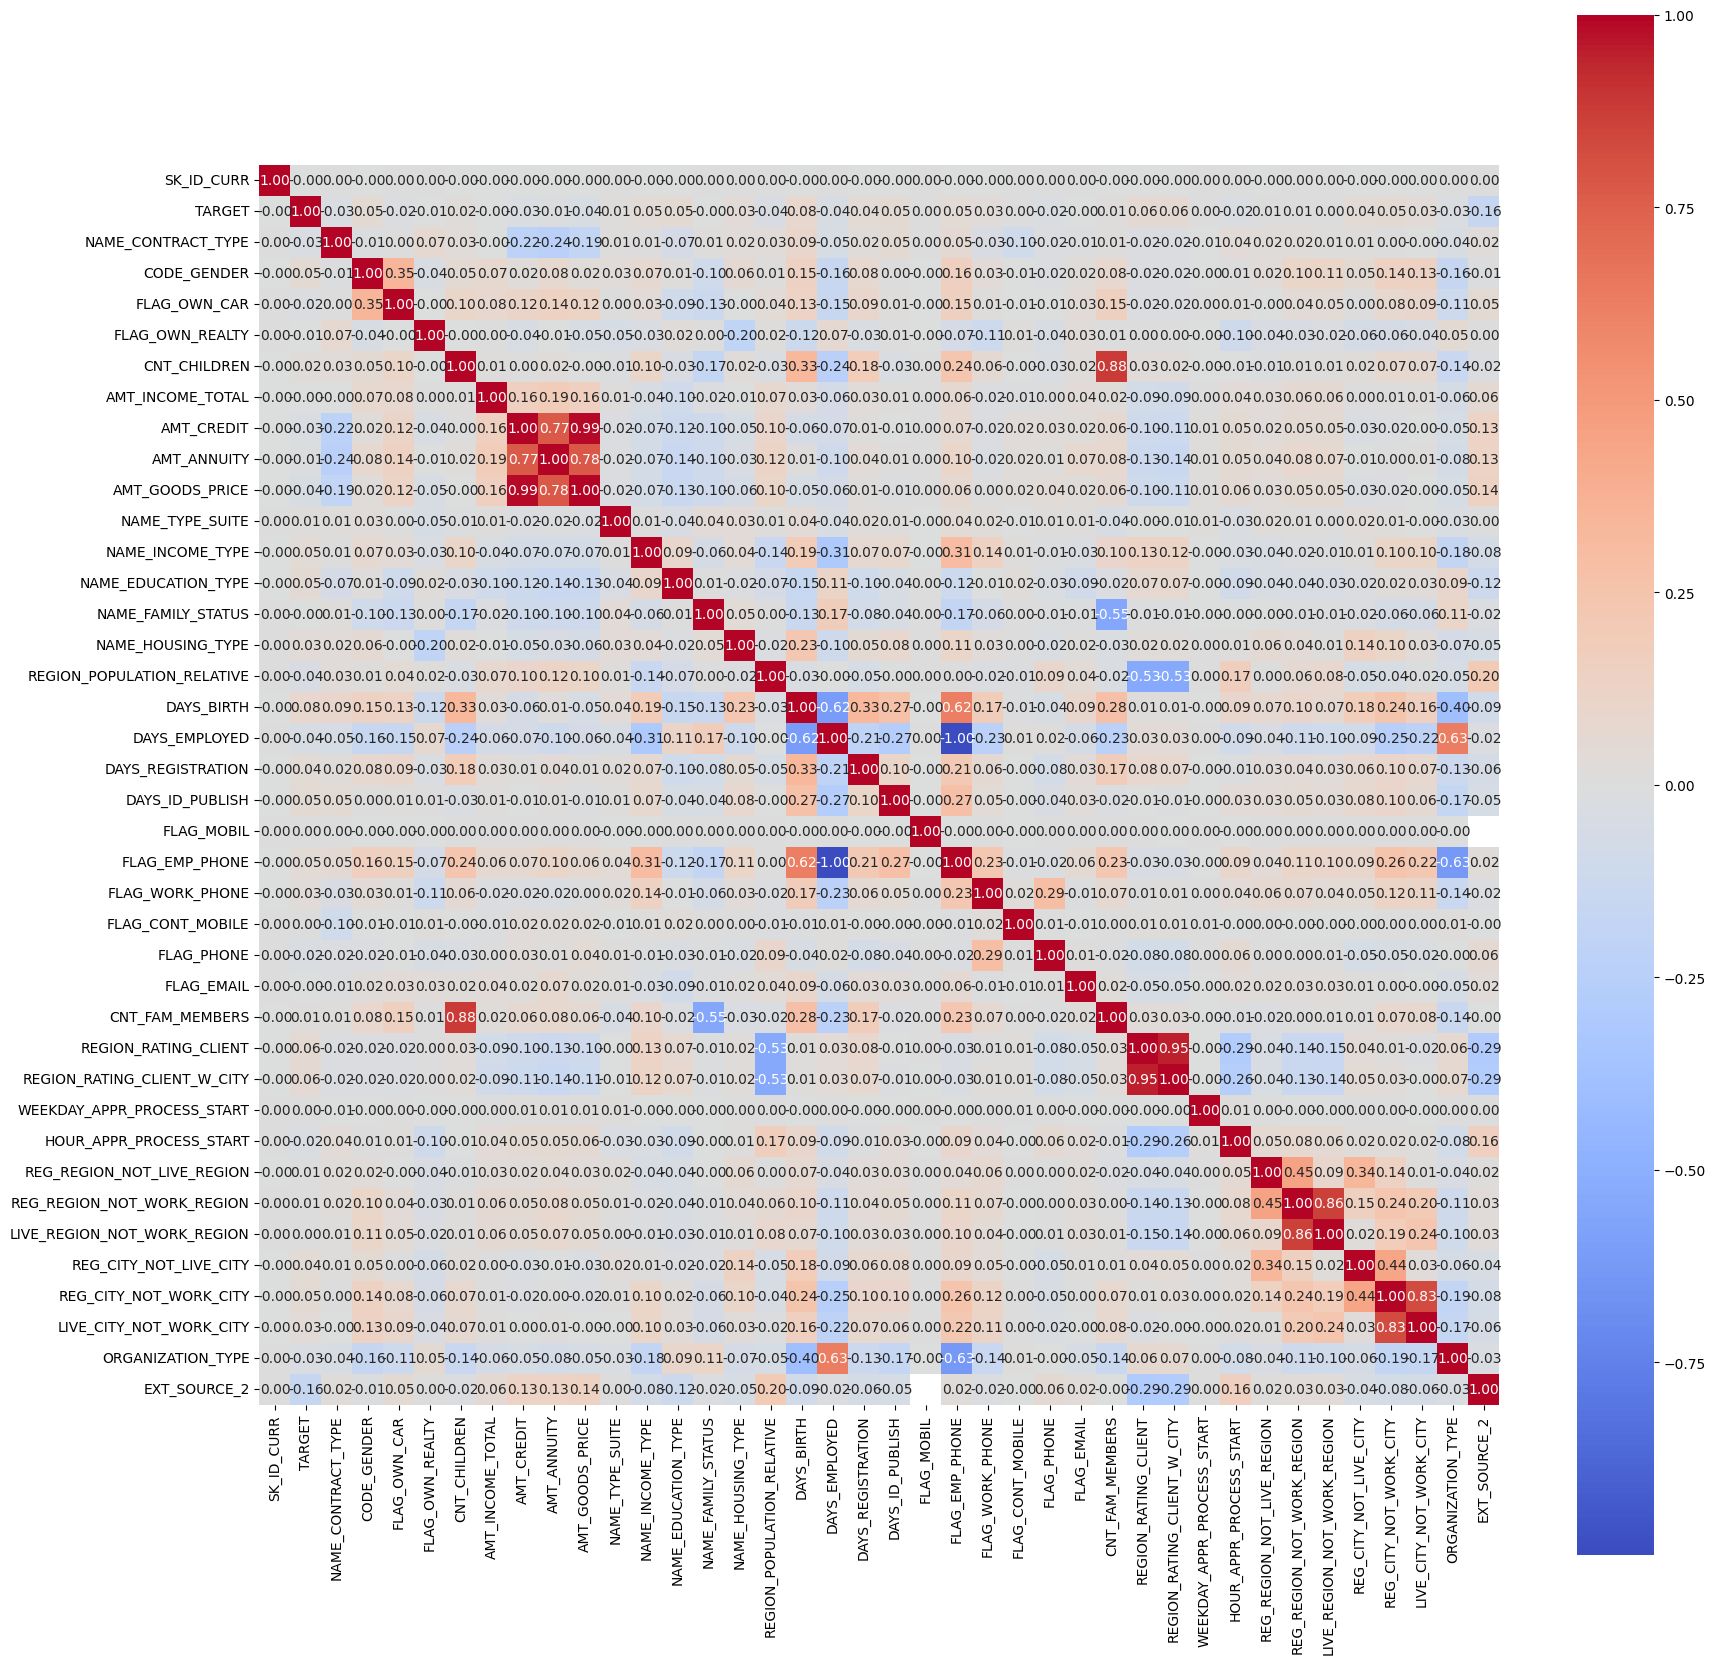

In [30]:
correlation_matrix = df_application_train_norm.corr()

plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

### Tìm hiểu về table bureau

In [31]:
df_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [32]:
df_bureau.isnull().mean()

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

Loại bỏ các cột không quan trọng mà có dữ liệu trống lớn hơn 0.1

In [33]:
df_bureau = df_bureau.loc[:, df_bureau.isnull().mean() <= 0.1]

In [34]:
df_bureau.isnull().mean()

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
dtype: float64

In [35]:
df_bureau.shape[0]

1716428

In [36]:
df_bureau['CREDIT_CURRENCY'].unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'],
      dtype=object)

In [37]:
currency_counts = df_bureau['CREDIT_CURRENCY'].value_counts()
for currency, count in currency_counts.items():
    print(f"Số record có CREDIT_CURRENCY = '{currency}': {count}")

Số record có CREDIT_CURRENCY = 'currency 1': 1715020
Số record có CREDIT_CURRENCY = 'currency 2': 1224
Số record có CREDIT_CURRENCY = 'currency 3': 174
Số record có CREDIT_CURRENCY = 'currency 4': 10


May mắn là dữ liệu đa số sử dụng 'currency 1', vậy có thể loại bỏ bớt các Currency còn lại tránh việc không cùng một loại tiền tệ.

In [38]:
df_bureau = df_bureau[df_bureau['CREDIT_CURRENCY'] == 'currency 1']

In [39]:
is_Category = df_bureau.dtypes == object
print(is_Category)

SK_ID_CURR                False
SK_ID_BUREAU              False
CREDIT_ACTIVE              True
CREDIT_CURRENCY            True
DAYS_CREDIT               False
CREDIT_DAY_OVERDUE        False
DAYS_CREDIT_ENDDATE       False
CNT_CREDIT_PROLONG        False
AMT_CREDIT_SUM            False
AMT_CREDIT_SUM_OVERDUE    False
CREDIT_TYPE                True
DAYS_CREDIT_UPDATE        False
dtype: bool


In [40]:
df_bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [41]:
df_bureau['CREDIT_TYPE'].unique()

array(['Consumer credit', 'Credit card', 'Mortgage', 'Car loan',
       'Microloan', 'Loan for working capital replenishment',
       'Loan for business development', 'Real estate loan',
       'Unknown type of loan', 'Another type of loan',
       'Cash loan (non-earmarked)', 'Loan for the purchase of equipment',
       'Mobile operator loan', 'Interbank credit',
       'Loan for purchase of shares (margin lending)'], dtype=object)

Chuyển đổi các giá trị phân loại (categorical values) thành các giá trị số (numeric values)

In [42]:
le = LabelEncoder()

is_Category = df_bureau.dtypes == object

category_column_list = df_bureau.columns[is_Category].tolist()

df_bureau[category_column_list] = df_bureau[category_column_list].apply(lambda col: le.fit_transform(col))

In [43]:
df_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,2,0,-497,0,-153.0,0,91323.0,0.0,3,-131
1,215354,5714463,0,0,-208,0,1075.0,0,225000.0,0.0,4,-20
2,215354,5714464,0,0,-203,0,528.0,0,464323.5,0.0,3,-16
3,215354,5714465,0,0,-203,0,NaN,0,90000.0,0.0,4,-16
4,215354,5714466,0,0,-629,0,1197.0,0,2700000.0,0.0,3,-21


Data được sắp xếp theo thứ tự các khoản vay của từng khách hàng, vậy điền Forward fill là một phương thức hợp lý

In [44]:
df_bureau = df_bureau.fillna(method='ffill')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6668\2863227114.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bureau = df_bureau.fillna(method='ffill')


In [45]:
df_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,2,0,-497,0,-153.0,0,91323.0,0.0,3,-131
1,215354,5714463,0,0,-208,0,1075.0,0,225000.0,0.0,4,-20
2,215354,5714464,0,0,-203,0,528.0,0,464323.5,0.0,3,-16
3,215354,5714465,0,0,-203,0,528.0,0,90000.0,0.0,4,-16
4,215354,5714466,0,0,-629,0,1197.0,0,2700000.0,0.0,3,-21


Sau dó tiếp tục fill cho những giá trị còn thiếu bằng mean()

In [46]:
df_bureau = df_bureau.fillna(df_bureau.mean())

In [47]:
df_bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,2,0,-497,0,-153.0,0,91323.0,0.0,3,-131
1,215354,5714463,0,0,-208,0,1075.0,0,225000.0,0.0,4,-20
2,215354,5714464,0,0,-203,0,528.0,0,464323.5,0.0,3,-16
3,215354,5714465,0,0,-203,0,528.0,0,90000.0,0.0,4,-16
4,215354,5714466,0,0,-629,0,1197.0,0,2700000.0,0.0,3,-21


In [48]:
df_bureau.shape[0]

1715020

Gộp lại theo ID khách hàng ```(SK_ID_CURR)```

In [49]:
df_bureau_grouped = df_bureau.groupby('SK_ID_CURR').mean()


In [50]:
df_bureau_grouped = df_bureau_grouped.reset_index()

In [51]:
df_bureau_grouped.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100001,5896633.000,1.142857,0.0,-735.000000,0.0,82.428571,0.0,207623.571429,0.0,3.000000,-93.142857
1,100002,6153272.125,1.500000,0.0,-874.000000,0.0,-380.875000,0.0,108131.945625,0.0,3.500000,-499.875000
2,100003,5885878.500,1.500000,0.0,-1400.750000,0.0,-544.500000,0.0,254350.125000,0.0,3.500000,-816.000000
3,100004,6829133.500,2.000000,0.0,-867.000000,0.0,-488.500000,0.0,94518.900000,0.0,3.000000,-532.000000
4,100005,6735201.000,0.666667,0.0,-190.666667,0.0,439.333333,0.0,219042.000000,0.0,3.333333,-54.333333


In [52]:
df_bureau_grouped.shape[0]

305773

Kết quả đúng bằng số record về khách hàng trong table ```application_train```

### Tìm hiểu về table bureau_balance

In [53]:
df_bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [54]:
df_bureau_balance.isnull().mean()

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [55]:
df_bureau_balance['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

In [56]:
df_bureau_balance.shape[0]

27299925

Thông qua tìm hiểu thì em biết ```C``` là khoản vay đã đóng, còn ```X``` là không xác định trạng thái.<br>
Vậy cần loại bỏ các bản ghi có ```STATUS  = X``` 

In [57]:
df_bureau_balance = df_bureau_balance[df_bureau_balance['STATUS'] != 'X']

In [58]:
df_bureau_balance.shape[0]

21489443

In [59]:
df_bureau_balance['STATUS'].unique()

array(['C', '0', '1', '2', '3', '5', '4'], dtype=object)

Tạm thời chuẩn hóa ```C ~ -1``` vì đây là trạng tháy tốt nhất, các ```STATUS value``` còn lại giữ nguyên.<br>
Sau này, có thể cải tiến mô hình bằng cách thay đổi cách chuẩn hóa, nhất là đối với ```STATUS == 5```.

In [60]:
df_bureau_balance['STATUS'] = df_bureau_balance['STATUS'].apply(lambda x: -1 if x == 'C' else x)

In [61]:
df_bureau_balance['STATUS'].unique()

array([-1, '0', '1', '2', '3', '5', '4'], dtype=object)

In [62]:
df_bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,-1
1,5715448,-1,-1
2,5715448,-2,-1
3,5715448,-3,-1
4,5715448,-4,-1


Em quan tâm đến trạng thái của các khoản vay tại tháng gần nhất, giả thuyết là mọi khoản vay đều có data where ```MOTNHS_BALANCE == 0```

In [63]:
def check_hypothesis(df):
    # Kiểm tra nếu mỗi khoản vay (SK_ID_CURR) có ít nhất một bản ghi với MONTHS_BALANCE == 0
    unique_loans = df['SK_ID_BUREAU'].unique()  # Lấy danh sách các ID khoản vay
    for loan_id in unique_loans:
        # Lọc ra các bản ghi của khoản vay
        loan_data = df[df['SK_ID_BUREAU'] == loan_id]
        # Kiểm tra nếu không có bản ghi với MONTHS_BALANCE == 0
        if not any(loan_data['MONTHS_BALANCE'] == 0):
            return False  # Nếu có khoản vay không có MONTHS_BALANCE == 0, trả về False
    return True  # Nếu tất cả các khoản vay đều có ít nhất một bản ghi với MONTHS_BALANCE == 0

# Sử dụng hàm kiểm tra với DataFrame của bạn
is_hypothesis_valid = check_hypothesis(df_bureau_balance)
print(is_hypothesis_valid)


False


Giả thuyết sai, vậy cần lấy thông tin về tháng gần nhất mà ta có thể có được

In [64]:
df_bureau_balance_nearest = df_bureau_balance.loc[df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].idxmax()]

In [65]:
df_bureau_balance_nearest.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079753,5001709,0,-1
2846316,5001710,0,-1
2846400,5001711,-1,0
2846403,5001712,0,-1
25508689,5001716,0,-1


Bỏ đi cột ```MONTHS_BALANCE``` tránh nhiễu cho training model về sau.<br>
Việc thu thập dữ liệu là trách nhiệm của ngân hàng, không liên quan đến khách hàng

In [66]:
df_bureau_balance_nearest = df_bureau_balance_nearest.drop(columns=['MONTHS_BALANCE'])

In [67]:
df_bureau_balance_nearest.head(5)

,SK_ID_BUREAU,STATUS
26079753,5001709,-1
2846316,5001710,-1
2846400,5001711,0
2846403,5001712,-1
25508689,5001716,-1


In [68]:
df_bureau_balance_nearest.shape[0]

731826

Ít hơn số bản ghi trong ```df_bureau```

In [69]:
missing_bureau_ids = df_bureau[~df_bureau['SK_ID_BUREAU'].isin(df_bureau_balance_nearest['SK_ID_BUREAU'])]

print(missing_bureau_ids)

         SK_ID_CURR  SK_ID_BUREAU  CREDIT_ACTIVE  CREDIT_CURRENCY  \
0            215354       5714462              2                0   
1            215354       5714463              0                0   
2            215354       5714464              0                0   
3            215354       5714465              0                0   
4            215354       5714466              0                0   
...             ...           ...            ...              ...   
1716423      259355       5057750              0                0   
1716424      100044       5057754              2                0   
1716425      100044       5057762              2                0   
1716426      246829       5057770              2                0   
1716427      246829       5057778              2                0   

         DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0               -497                   0               -153.0   
1               -208                   0 

### Tìm hiểu về table previous_application

In [70]:
df_previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1,1730.430,17145.0,17145.0,0.0,17145.0,2,15,...,2,12.0,4,13,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,0,25188.615,607500.0,679671.0,NaN,607500.0,4,11,...,10,36.0,2,7,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,0,15060.735,112500.0,136444.5,NaN,112500.0,5,11,...,10,12.0,1,6,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,0,47041.335,450000.0,470790.0,NaN,450000.0,1,7,...,10,12.0,4,8,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,0,31924.395,337500.0,404055.0,NaN,337500.0,4,9,...,10,24.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_previous_application.shape[0]

1670214

In [72]:
df_previous_application = df_previous_application.loc[:, df_previous_application.isnull().mean() <= 0.1]

In [75]:
le = LabelEncoder()
df_previous_application_norm = df_previous_application

is_Category = df_previous_application_norm.dtypes == object

category_column_list = df_previous_application_norm.columns[is_Category].tolist()

df_previous_application_norm[category_column_list] = df_previous_application_norm[category_column_list].apply(lambda col: le.fit_transform(col))

In [175]:
df_previous_application_norm.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,1,17145.0,17145.0,2,15,1,1,23,...,7,2,19,3,0,4,35,2,4,13
1,2802425,108129,0,607500.0,679671.0,4,11,1,1,24,...,6,2,27,2,2,3,-1,10,2,7
2,2523466,122040,0,112500.0,136444.5,5,11,1,1,24,...,5,2,27,2,2,5,-1,10,1,6
3,2819243,176158,0,450000.0,470790.0,1,7,1,1,24,...,7,2,27,2,2,5,-1,10,4,8
4,1784265,202054,0,337500.0,404055.0,4,9,1,1,20,...,7,2,27,2,1,5,-1,10,1,3


In [77]:
df_previous_application_norm = df_previous_application_norm.fillna(df_previous_application_norm.mean())

In [176]:
df_previous_application_norm_grouped = df_previous_application_norm.groupby('SK_ID_CURR').mean().reset_index()

In [177]:
df_previous_application_norm_grouped.head(5)

,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100001,1.369693e+06,1.000000,24835.50,23787.00,0.000000,13.000000,1.0,1.0,23.000000,...,1.000000,1.000000,19.0,3.000000,0.000000,4.000000,23.0,2.000000,1.000000,13.0
1,100002,1.038818e+06,1.000000,179055.00,179055.00,2.000000,9.000000,1.0,1.0,23.000000,...,7.000000,0.000000,25.0,3.000000,0.000000,7.000000,500.0,0.000000,3.000000,15.0
2,100003,2.281150e+06,0.666667,435436.50,484191.00,1.666667,14.666667,1.0,1.0,23.333333,...,2.666667,1.333333,15.0,2.666667,0.666667,5.333333,533.0,6.333333,3.666667,9.0
3,100004,1.564014e+06,1.000000,24282.00,20106.00,0.000000,5.000000,1.0,1.0,23.000000,...,6.000000,0.000000,19.0,3.000000,0.000000,6.000000,30.0,2.000000,4.000000,14.0
4,100005,2.176837e+06,0.500000,22308.75,20076.75,2.000000,10.500000,1.0,1.0,23.500000,...,7.000000,1.000000,23.0,3.500000,0.000000,4.500000,18.0,6.000000,0.500000,7.5


### Tìm hiểu về table POS_CASH_balance

In [78]:
df_POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [79]:
df_POS_CASH_balance.shape[1]

8

In [80]:
df_POS_CASH_balance = df_POS_CASH_balance.loc[:, df_POS_CASH_balance.isnull().mean() <= 0.1]

In [81]:
df_POS_CASH_balance.shape[1]

8

In [82]:
df_POS_CASH_balance.apply(lambda col: col.unique())

SK_ID_PREV               [1803195, 1715348, 1784872, 1903291, 2341044, ...
SK_ID_CURR               [182943, 367990, 397406, 269225, 334279, 34216...
MONTHS_BALANCE           [-31, -33, -32, -35, -38, -39, -34, -41, -37, ...
CNT_INSTALMENT           [48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0...
CNT_INSTALMENT_FUTURE    [45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0...
NAME_CONTRACT_STATUS     [Active, Completed, Signed, Approved, Returned...
SK_DPD                   [0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10...
SK_DPD_DEF               [0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6...
dtype: object

In [83]:
le = LabelEncoder()
df_POS_CASH_balance_norm = df_POS_CASH_balance

is_Category = df_POS_CASH_balance_norm.dtypes == object

category_column_list = df_POS_CASH_balance_norm.columns[is_Category].tolist()

df_POS_CASH_balance_norm[category_column_list] = df_POS_CASH_balance_norm[category_column_list].apply(lambda col: le.fit_transform(col))

In [84]:
df_POS_CASH_balance_norm_grouped = df_POS_CASH_balance_norm.groupby('SK_ID_CURR').mean()

In [85]:
df_POS_CASH_balance_norm_grouped.shape[0]

337252

### Tìm hiểu về table credit_card_balance

In [86]:
df_credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [87]:
df_credit_card_balance.shape[1]

23

In [88]:
df_credit_card_balance.shape[0]

3840312

In [89]:
df_credit_card_balancee = df_credit_card_balance.loc[:, df_credit_card_balance.isnull().mean() <= 0.1]

In [90]:
df_credit_card_balance.shape[1]

23

In [91]:
df_credit_card_balance.apply(lambda col: col.unique())

SK_ID_PREV                    [2562384, 2582071, 1740877, 1389973, 1891521, ...
SK_ID_CURR                    [378907, 363914, 371185, 337855, 126868, 38001...
MONTHS_BALANCE                [-6, -1, -7, -4, -5, -3, -2, -19, -13, -18, -1...
AMT_BALANCE                   [56.97, 63975.555, 31815.225, 236572.11, 45391...
AMT_CREDIT_LIMIT_ACTUAL       [135000, 45000, 450000, 225000, 270000, 585000...
AMT_DRAWINGS_ATM_CURRENT      [0.0, 2250.0, 67500.0, 45000.0, 90000.0, 76500...
AMT_DRAWINGS_CURRENT          [877.5, 2250.0, 0.0, 11547.0, 67500.0, 45000.0...
AMT_DRAWINGS_OTHER_CURRENT    [0.0, 137700.0, nan, 177840.0, 46800.0, 187200...
AMT_DRAWINGS_POS_CURRENT      [877.5, 0.0, 11547.0, 199339.425, 34526.7, 968...
AMT_INST_MIN_REGULARITY       [1700.325, 2250.0, 11795.76, 22924.89, 4449.10...
AMT_PAYMENT_CURRENT           [1800.0, 2250.0, 11925.0, 27000.0, 3825.0, 157...
AMT_PAYMENT_TOTAL_CURRENT     [1800.0, 2250.0, 11925.0, 27000.0, 3825.0, 157...
AMT_RECEIVABLE_PRINCIPAL      [0.0, 6017

In [92]:
le = LabelEncoder()
df_credit_card_balance_norm = df_credit_card_balance

is_Category = df_credit_card_balance_norm.dtypes == object

category_column_list = df_credit_card_balance_norm.columns[is_Category].tolist()

df_credit_card_balance_norm[category_column_list] = df_credit_card_balance_norm[category_column_list].apply(lambda col: le.fit_transform(col))

In [93]:
df_credit_card_balance.shape[0]

3840312

In [94]:
df_credit_card_balance_norm_grouped = df_credit_card_balance_norm.groupby('SK_ID_CURR').mean()

In [95]:
df_credit_card_balance_norm_grouped.shape[0]

103558

### Tìm hiểu về installments_payments

In [96]:
df_installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [97]:
df_installments_payments.shape[0]

13605401

In [98]:
df_installments_payments.shape[1]

8

In [99]:
df_installments_payments =df_installments_payments.loc[:, df_installments_payments.isnull().mean() <= 0.1]

In [100]:
df_installments_payments.shape[1]

8

In [101]:
le = LabelEncoder()
df_installments_payments_norm = df_installments_payments

is_Category = df_installments_payments_norm .dtypes == object

category_column_list =df_installments_payments_norm .columns[is_Category].tolist()

df_installments_payments_norm [category_column_list] = df_installments_payments_norm [category_column_list].apply(lambda col: le.fit_transform(col))

In [102]:
df_installments_payments_norm.shape[0]

13605401

In [103]:
df_installments_payments_norm.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [104]:
df_installments_payments_norm_grouped =df_installments_payments_norm.groupby('SK_ID_CURR').mean().reset_index()

In [105]:
df_installments_payments_norm_grouped.head(5)

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100001,1.576389e+06,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.038818e+06,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,2.290070e+06,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.564014e+06,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,2.495675e+06,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


In [106]:
df_installments_payments_norm_grouped.shape[0]

339587

# Data merging

### Join bureau

Tại đây có 2 sự lựa chọn: <br>
* Sử dụng left join để tránh lãng phí thông tin ở các attribute khác, điền thêm vào các giá trị còn trống.<br>
* Chỉ sử dụng các bản ghi mà ta nắm được ```STATUS``` tháng gần nhất - inner join.<br>
Có thể thử cả 2 để thử nghiệm mô hình.<br>
Hiện tại em chọn phương án 2, vì với em  ```STATUS``` tháng gần nhất là một loại dữ liệu quan trọng

In [107]:
df_bureau.shape[0]

1715020

In [108]:
df_bureau_balance_nearest.shape[0]

731826

In [109]:
df_bureau_merged = df_bureau.merge(df_bureau_balance_nearest, on='SK_ID_BUREAU', how='inner')

In [110]:
df_bureau_merged.shape[0]

693612

In [111]:
df_bureau_merged.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,STATUS
0,380361,5715448,0,0,-820,0,31069.0,0,67500.0,0.0,4,-183,-1
1,380361,5715449,0,0,-357,0,1119.0,0,45000.0,0.0,4,-130,-1
2,380361,5715451,2,0,-917,0,-187.0,0,74439.0,0.0,3,-748,-1
3,380361,5715452,2,0,-993,0,31039.0,0,315000.0,0.0,4,-818,-1
4,380361,5715453,2,0,-1146,0,681.0,0,2025000.0,0.0,3,-769,-1


Gộp lại theo ID khách hàng ```(SK_ID_CURR)```

In [112]:
df_bureau_merged['STATUS'] = df_bureau_merged['STATUS'].astype(int)

In [113]:
le = LabelEncoder()

is_Category = df_bureau_merged.dtypes == object

category_column_list = df_bureau_merged.columns[is_Category].tolist()

df_bureau_merged[category_column_list] = df_bureau_merged[category_column_list].apply(lambda col: le.fit_transform(col))

In [114]:
df_bureau_merged_grouped = df_bureau_merged.groupby('SK_ID_CURR').mean()

In [115]:
df_bureau_merged_grouped.shape[0]

131715

In [116]:
df_bureau_merged_grouped = df_bureau_merged_grouped.reset_index()

In [117]:
df_bureau_merged_grouped.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,STATUS
0,100001,5896633.000,1.142857,0.0,-735.000000,0.0,82.428571,0.0,207623.571429,0.0,3.000000,-93.142857,-0.428571
1,100002,6153272.125,1.500000,0.0,-874.000000,0.0,-380.875000,0.0,108131.945625,0.0,3.500000,-499.875000,-0.750000
2,100005,6735201.000,0.666667,0.0,-190.666667,0.0,439.333333,0.0,219042.000000,0.0,3.333333,-54.333333,-0.333333
3,100010,5576631.000,1.000000,0.0,-1939.500000,0.0,-119.500000,0.0,495000.000000,0.0,4.500000,-578.000000,-1.000000
4,100013,5922082.000,2.000000,0.0,-1913.333333,0.0,-1061.000000,0.0,681930.000000,0.0,1.666667,-1032.666667,-1.000000


In [118]:
df_bureau_merged_grouped = df_bureau_merged_grouped.drop(columns=['SK_ID_BUREAU'])

In [119]:
df_bureau_merged_grouped.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,STATUS
0,100001,1.142857,0.0,-735.000000,0.0,82.428571,0.0,207623.571429,0.0,3.000000,-93.142857,-0.428571
1,100002,1.500000,0.0,-874.000000,0.0,-380.875000,0.0,108131.945625,0.0,3.500000,-499.875000,-0.750000
2,100005,0.666667,0.0,-190.666667,0.0,439.333333,0.0,219042.000000,0.0,3.333333,-54.333333,-0.333333
3,100010,1.000000,0.0,-1939.500000,0.0,-119.500000,0.0,495000.000000,0.0,4.500000,-578.000000,-1.000000
4,100013,2.000000,0.0,-1913.333333,0.0,-1061.000000,0.0,681930.000000,0.0,1.666667,-1032.666667,-1.000000


Vậy số bản ghi từ 305773 -> 131715

In [120]:
if df_bureau_merged_grouped.isnull().values.any():
    print("DataFrame vẫn còn giá trị NaN.")
else:
    print("DataFrame không còn giá trị NaN.")

DataFrame không còn giá trị NaN.


Có 2 attribute còn lại là string<br> 
* ```CREDIT_ACTIVE``` được chuẩn hóa theo thứ tự từ tốt đến xấu<br>
* ```CREDIT_TYPE``` gồm quá nhiều type và khó để chuẩn hóa nếu group by và sử dụng hàm mean(), vậy drop cột này

In [121]:
df_bureau_merged_grouped = df_bureau_merged_grouped.drop(columns=['CREDIT_TYPE'])

In [122]:
df_bureau_merged_grouped.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,STATUS
0,100001,1.142857,0.0,-735.000000,0.0,82.428571,0.0,207623.571429,0.0,-93.142857,-0.428571
1,100002,1.500000,0.0,-874.000000,0.0,-380.875000,0.0,108131.945625,0.0,-499.875000,-0.750000
2,100005,0.666667,0.0,-190.666667,0.0,439.333333,0.0,219042.000000,0.0,-54.333333,-0.333333
3,100010,1.000000,0.0,-1939.500000,0.0,-119.500000,0.0,495000.000000,0.0,-578.000000,-1.000000
4,100013,2.000000,0.0,-1913.333333,0.0,-1061.000000,0.0,681930.000000,0.0,-1032.666667,-1.000000


In [123]:
df_bureau_merged_grouped.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,STATUS
0,100001,1.142857,0.0,-735.000000,0.0,82.428571,0.0,207623.571429,0.0,-93.142857,-0.428571
1,100002,1.500000,0.0,-874.000000,0.0,-380.875000,0.0,108131.945625,0.0,-499.875000,-0.750000
2,100005,0.666667,0.0,-190.666667,0.0,439.333333,0.0,219042.000000,0.0,-54.333333,-0.333333
3,100010,1.000000,0.0,-1939.500000,0.0,-119.500000,0.0,495000.000000,0.0,-578.000000,-1.000000
4,100013,2.000000,0.0,-1913.333333,0.0,-1061.000000,0.0,681930.000000,0.0,-1032.666667,-1.000000


Join với bảng chính 

In [124]:
df_merged_1 = pd.merge(df_bureau_merged_grouped, df_application_train, how='inner', on='SK_ID_CURR')


In [125]:
df_merged_2 = pd.merge(df_bureau_merged_grouped, df_application_train_target, how='inner', on='SK_ID_CURR')

In [126]:
df_merged_1.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1.5,0.0,-874.0,0.0,-380.875,0.0,108131.945625,0.0,-499.875,...,6,10,0,0,0,0,0,0,5,0.262949
1,100010,1.0,0.0,-1939.5,0.0,-119.500,0.0,495000.000000,0.0,-578.000,...,1,16,0,0,0,0,1,1,33,0.714279
2,100019,0.0,0.0,-495.0,0.0,5441.000,0.0,360000.000000,0.0,-26.500,...,2,6,0,0,0,1,1,0,4,0.346634
3,100032,1.5,0.0,-1071.0,0.0,-525.250,0.0,317790.000000,0.0,-436.750,...,2,10,0,0,0,0,1,1,16,0.541124
4,100033,0.0,0.0,-195.0,0.0,913.000,0.0,675000.000000,0.0,-169.000,...,6,11,0,1,1,0,0,0,31,0.685011


In [127]:
df_merged_1.shape[0]

90610

In [128]:
df_merged_1 = df_merged_1.fillna(df_merged_1.mean())

In [129]:
df_merged_2 = df_merged_2.fillna(df_merged_2.mean())

In [130]:
is_Category = df_merged_1.dtypes == object

category_column_list = df_merged_1.columns[is_Category].tolist()

df_merged_1[category_column_list] = df_merged_1[category_column_list].apply(lambda col: le.fit_transform(col))

In [131]:
is_Category = df_merged_2.dtypes == object

category_column_list = df_merged_2.columns[is_Category].tolist()

df_merged_2[category_column_list] = df_merged_2[category_column_list].apply(lambda col: le.fit_transform(col))

In [132]:
df_merged_1.head(5)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1.5,0.0,-874.0,0.0,-380.875,0.0,108131.945625,0.0,-499.875,...,6,10,0,0,0,0,0,0,5,0.262949
1,100010,1.0,0.0,-1939.5,0.0,-119.500,0.0,495000.000000,0.0,-578.000,...,1,16,0,0,0,0,1,1,33,0.714279
2,100019,0.0,0.0,-495.0,0.0,5441.000,0.0,360000.000000,0.0,-26.500,...,2,6,0,0,0,1,1,0,4,0.346634
3,100032,1.5,0.0,-1071.0,0.0,-525.250,0.0,317790.000000,0.0,-436.750,...,2,10,0,0,0,0,1,1,16,0.541124
4,100033,0.0,0.0,-195.0,0.0,913.000,0.0,675000.000000,0.0,-169.000,...,6,11,0,1,1,0,0,0,31,0.685011


In [133]:
df_merged_1 = df_merged_1.drop(columns=['SK_ID_CURR'])

In [134]:
df_merged_2 = df_merged_2.drop(columns=['SK_ID_CURR'])

In [135]:
df_application_train_norm = df_application_train
is_Category = df_application_train_norm.dtypes == object

category_column_list = df_application_train.columns[is_Category].tolist()

df_application_train_norm[category_column_list] = df_application_train_norm[category_column_list].apply(lambda col: le.fit_transform(col))

In [136]:
df_application_train_norm.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,6,10,0,0,0,0,0,0,5,0.262949
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,11,0,0,0,0,0,0,39,0.622246
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,1,9,0,0,0,0,0,0,11,0.555912
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,6,17,0,0,0,0,0,0,5,0.650442
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,4,11,0,0,0,0,1,1,37,0.322738


In [137]:
df_application_train_norm = df_application_train_norm.fillna(df_application_train_norm.mean())

In [138]:
df_application_train_norm = df_application_train_norm.drop(columns=['SK_ID_CURR'])

### Join previous

In [139]:
df_merged_3 = pd.merge(df_previous_application_norm_grouped, df_application_train_target, how='inner', on='SK_ID_CURR')

In [140]:
df_merged_3.shape[0]

291057

In [141]:
df_merged_3 = df_merged_3.drop(columns=['SK_ID_CURR'])
df_merged_3 = df_merged_3.drop(columns=['SK_ID_PREV'])

In [142]:
df_merged_3 = df_merged_3.fillna(df_merged_3.mean())

In [143]:
df_merged_4 = pd.merge(df_POS_CASH_balance_norm_grouped, df_application_train_target, how='inner', on='SK_ID_CURR')

In [144]:
df_merged_4 = df_merged_4.drop(columns=['SK_ID_CURR'])
df_merged_4 = df_merged_4.drop(columns=['SK_ID_PREV'])

In [145]:
df_merged_4 = df_merged_4.fillna(df_merged_4.mean())

In [146]:
df_merged_5 = pd.merge(df_credit_card_balance_norm_grouped, df_application_train_target, how='inner', on='SK_ID_CURR')
df_merged_5 = df_merged_5.drop(columns=['SK_ID_CURR'])
df_merged_5 = df_merged_5.drop(columns=['SK_ID_PREV'])
df_merged_5 = df_merged_5.fillna(df_merged_5.mean())

In [147]:
df_application_train_target.head(5)

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [148]:
df_merged_6 = pd.merge(df_installments_payments_norm_grouped, df_application_train_target, how='inner', on='SK_ID_CURR')


In [149]:
df_application_train_target.shape[0]

307511

In [150]:
df_merged_6.shape[0]

291643

In [151]:
df_merged_6 = df_merged_6.drop(columns=['SK_ID_CURR'])
df_merged_6 = df_merged_6.drop(columns=['SK_ID_PREV'])

df_merged_6 = df_merged_6.fillna(df_merged_6.mean())

In [152]:
df_application_train_target.shape[0]

307511

In [172]:
df_merged_6.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0


### Final 

In [170]:
df_previous_application_norm_grouped.reset_index()

,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100001,1.369693e+06,1.000000,3951.000000,24835.500,23787.00,2520.00,24835.500,0.000000,13.000000,...,2.000000,8.00,1.000000,13.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,1.038818e+06,1.000000,9251.775000,179055.000,179055.00,0.00,179055.000,2.000000,9.000000,...,0.000000,24.00,3.000000,15.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,2.281150e+06,0.666667,56553.990000,435436.500,484191.00,3442.50,435436.500,1.666667,14.666667,...,6.333333,10.00,3.666667,9.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,1.564014e+06,1.000000,5357.250000,24282.000,20106.00,4860.00,24282.000,0.000000,5.000000,...,2.000000,4.00,4.000000,14.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,2.176837e+06,0.500000,4813.200000,22308.750,20076.75,4464.00,44617.500,2.000000,10.500000,...,6.000000,12.00,0.500000,7.5,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,2.248017e+06,1.000000,6605.910000,40455.000,40455.00,0.00,40455.000,4.000000,17.000000,...,2.000000,8.00,1.000000,13.0,365243.0,-210.000000,0.000000,-30.000000,-25.000000,0.000000
338853,456252,1.503599e+06,1.000000,10074.465000,57595.500,56821.50,3456.00,57595.500,6.000000,10.000000,...,4.000000,6.00,3.000000,10.0,365243.0,-2466.000000,-2316.000000,-2316.000000,-2311.000000,1.000000
338854,456253,1.677221e+06,1.000000,4770.405000,24162.750,20625.75,4403.25,24162.750,3.500000,11.500000,...,2.000000,5.00,1.000000,13.0,365243.0,-2339.000000,-2219.000000,-2219.000000,-2212.500000,0.500000
338855,456254,1.904658e+06,1.000000,10681.132500,121317.750,134439.75,0.00,121317.750,4.000000,15.000000,...,3.000000,15.00,2.000000,11.0,365243.0,-269.000000,151.000000,365243.000000,365243.000000,0.500000


In [179]:
df_merged_1_new = pd.merge(df_bureau_merged_grouped, df_application_train, how='inner', on='SK_ID_CURR')

In [180]:
df_final = pd.merge(df_previous_application_norm_grouped, df_merged_1_new, how='inner', on='SK_ID_CURR')

In [195]:
df_final_next = pd.merge(df_installments_payments_norm_grouped, df_merged_1_new, how='inner', on='SK_ID_CURR')

In [203]:
df_final_next = df_final_next.fillna(df_final_next.mean())

# Model testing with different Data Frame

### Old method

In [153]:
from sklearn.metrics import mean_absolute_percentage_error

In [154]:
import matplotlib.pyplot as plt

In [155]:
import numpy as np

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [158]:
def train_and_evaluate_model(df, target_column='TARGET', test_size=0.2, random_state=42):
    # Tách dữ liệu thành features và target
    x = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Chia dữ liệu thành train và test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Mô hình GradientBoosting
    model_gb = GradientBoostingClassifier(learning_rate=0.01, random_state=random_state)
    model_gb.fit(x_train, y_train)
    acc_gb = model_gb.score(x_test, y_test)
    print(f'GradientBoosting Model Accuracy: {acc_gb * 100:.2f}%')
    
    
    y_pred_gb = model_gb.predict(x_test)
    precision_gb = precision_score(y_test, y_pred_gb)
    recall_gb = recall_score(y_test, y_pred_gb)
    f1_gb = f1_score(y_test, y_pred_gb)
    conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

    print("GradientBoosting Model - Precision:", precision_gb)
    print("GradientBoosting Model - Recall:", recall_gb)
    print("GradientBoosting Model - F1 Score:", f1_gb)
    print("GradientBoosting Model - Confusion Matrix:")
    #print(conf_matrix_gb)
    #print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
    
    # Mô hình XGBoost
    model_xgb = xgb.XGBClassifier(random_state=random_state, n_estimators=100)
    model_xgb.fit(x_train, y_train)
    acc_xgb = model_xgb.score(x_test, y_test)
    print(f'XGBoost Model Accuracy: {acc_xgb * 100:.2f}%')
    
    
    y_pred_xgb = model_xgb.predict(x_test)
    precision_xgb = precision_score(y_test, y_pred_xgb)
    recall_xgb = recall_score(y_test, y_pred_xgb)
    f1_xgb = f1_score(y_test, y_pred_xgb)
    conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

    print("XGBoost Model - Precision:", precision_xgb)
    print("XGBoost Model - Recall:", recall_xgb)
    print("XGBoost Model - F1 Score:", f1_xgb)
    print("XGBoost Model - Confusion Matrix:")
    #print(conf_matrix_xgb)
    #print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

    
    



In [ ]:
train_and_evaluate_model(df_merged_1)

KeyboardInterrupt: 

In [ ]:
train_and_evaluate_model(df_merged_2)

GradientBoosting Model Accuracy: 92.01%
XGBoost Model Accuracy: 91.94%


In [ ]:
train_and_evaluate_model(df_application_train_norm)

GradientBoosting Model Accuracy: 91.95%
XGBoost Model Accuracy: 91.92%


In [ ]:
df_status_target = df_merged_1[['STATUS', 'TARGET']]


In [ ]:
label_counts = df_status_target['TARGET'].value_counts()
print(label_counts)

TARGET
0    83229
1     7381
Name: count, dtype: int64


Khi một nhãn xuất hiện quá nhiều so với nhãn khác, mô hình học máy có thể thiên lệch và dự đoán chủ yếu vào nhãn phổ biến để đạt được accuracy cao.<br>
Vậy cần quan tâm đến các chỉ số khác như Precision, Recall, F1-Score ...

In [ ]:
train_and_evaluate_model(df_status_target)

GradientBoosting Model Accuracy: 92.01%
GradientBoosting Model - Precision: 0.0
GradientBoosting Model - Recall: 0.0
GradientBoosting Model - F1 Score: 0.0
GradientBoosting Model - Confusion Matrix:


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Model Accuracy: 92.01%
XGBoost Model - Precision: 0.0
XGBoost Model - Recall: 0.0
XGBoost Model - F1 Score: 0.0
XGBoost Model - Confusion Matrix:


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
train_and_evaluate_model(df_merged_1)

GradientBoosting Model Accuracy: 92.01%
GradientBoosting Model - Precision: 0.0
GradientBoosting Model - Recall: 0.0
GradientBoosting Model - F1 Score: 0.0
GradientBoosting Model - Confusion Matrix:


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Model Accuracy: 91.86%
XGBoost Model - Precision: 0.3291139240506329
XGBoost Model - Recall: 0.017955801104972375
XGBoost Model - F1 Score: 0.034053700065487885
XGBoost Model - Confusion Matrix:


In [ ]:
train_and_evaluate_model(df_merged_2)

GradientBoosting Model Accuracy: 92.01%
GradientBoosting Model - Precision: 0.0
GradientBoosting Model - Recall: 0.0
GradientBoosting Model - F1 Score: 0.0
GradientBoosting Model - Confusion Matrix:


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Model Accuracy: 91.94%
XGBoost Model - Precision: 0.15789473684210525
XGBoost Model - Recall: 0.0020718232044198894
XGBoost Model - F1 Score: 0.00408997955010225
XGBoost Model - Confusion Matrix:


In [ ]:
train_and_evaluate_model(df_application_train_norm)

GradientBoosting Model Accuracy: 91.95%


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GradientBoosting Model - Precision: 0.0
GradientBoosting Model - Recall: 0.0
GradientBoosting Model - F1 Score: 0.0
GradientBoosting Model - Confusion Matrix:
XGBoost Model Accuracy: 91.92%
XGBoost Model - Precision: 0.4444444444444444
XGBoost Model - Recall: 0.015356637704586786
XGBoost Model - F1 Score: 0.0296875
XGBoost Model - Confusion Matrix:


### New method

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
def train_and_evaluate_model_smote(df, target_column='TARGET', test_size=0.2, random_state=42):
    # Tách dữ liệu thành features và target
    x = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Chia dữ liệu thành train và test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)
    
    # Áp dụng SMOTE để oversample lớp thiểu số
    smote = SMOTE(random_state=random_state)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
    
    # Mô hình GradientBoosting
    model_gb = GradientBoostingClassifier(learning_rate=0.01, random_state=random_state)
    model_gb.fit(x_train_resampled, y_train_resampled)
    acc_gb = model_gb.score(x_test, y_test)
    print(f'GradientBoosting Model Accuracy: {acc_gb * 100:.2f}%')
    
    # Dự đoán và tính toán các chỉ số cho GradientBoosting
    y_pred_gb = model_gb.predict(x_test)
    precision_gb = precision_score(y_test, y_pred_gb) * 100
    recall_gb = recall_score(y_test, y_pred_gb) * 100
    f1_gb = f1_score(y_test, y_pred_gb) * 100
    print("GradientBoosting Model - Precision: {:.2f}%".format(precision_gb))
    print("GradientBoosting Model - Recall: {:.2f}%".format(recall_gb))
    print("GradientBoosting Model - F1 Score: {:.2f}%".format(f1_gb))
    print("=====================================================")

    
    # Mô hình XGBoost
    model_xgb = xgb.XGBClassifier(random_state=random_state, n_estimators=100)
    model_xgb.fit(x_train_resampled, y_train_resampled)
    acc_xgb = model_xgb.score(x_test, y_test)
    print(f'XGBoost Model Accuracy: {acc_xgb * 100:.2f}%')
    
    # Dự đoán và tính toán các chỉ số cho XGBoost
    y_pred_xgb = model_xgb.predict(x_test)
    precision_xgb = precision_score(y_test, y_pred_xgb) * 100
    recall_xgb = recall_score(y_test, y_pred_xgb) * 100
    f1_xgb = f1_score(y_test, y_pred_xgb) * 100
    print("XGBoost Model - Precision: {:.2f}%".format(precision_xgb))
    print("XGBoost Model - Recall: {:.2f}%".format(recall_xgb))
    print("XGBoost Model - F1 Score: {:.2f}%".format(f1_xgb))


In [162]:
df_new = df_merged_1.head(1000)

In [ ]:
train_and_evaluate_model_smote(df_merged_1)

GradientBoosting Model Accuracy: 73.23%
GradientBoosting Model - Precision: 11.29%
GradientBoosting Model - Recall: 33.33%
GradientBoosting Model - F1 Score: 16.86%
XGBoost Model Accuracy: 90.79%
XGBoost Model - Precision: 22.35%
XGBoost Model - Recall: 5.28%
XGBoost Model - F1 Score: 8.55%


In [163]:
train_and_evaluate_model_smote(df_merged_2)

GradientBoosting Model Accuracy: 63.33%
GradientBoosting Model - Precision: 9.41%
GradientBoosting Model - Recall: 40.58%
GradientBoosting Model - F1 Score: 15.27%
XGBoost Model Accuracy: 84.90%
XGBoost Model - Precision: 11.30%
XGBoost Model - Recall: 12.47%
XGBoost Model - F1 Score: 11.86%


In [ ]:
train_and_evaluate_model_smote(df_application_train_norm)

GradientBoosting Model Accuracy: 70.53%
GradientBoosting Model - Precision: 11.48%
GradientBoosting Model - Recall: 39.52%
GradientBoosting Model - F1 Score: 17.80%
XGBoost Model Accuracy: 91.12%
XGBoost Model - Precision: 22.72%
XGBoost Model - Recall: 4.17%
XGBoost Model - F1 Score: 7.05%


In [ ]:
train_and_evaluate_model_smote(df_status_target)

GradientBoosting Model Accuracy: 61.24%
GradientBoosting Model - Precision: 10.29%
GradientBoosting Model - Recall: 48.71%
GradientBoosting Model - F1 Score: 16.99%
XGBoost Model Accuracy: 58.61%
XGBoost Model - Precision: 10.01%
XGBoost Model - Recall: 51.08%
XGBoost Model - F1 Score: 16.74%


In [ ]:
train_and_evaluate_model_smote(df_status_target)

GradientBoosting Model Accuracy: 61.24%
GradientBoosting Model - Precision: 10.29%
GradientBoosting Model - Recall: 48.71%
GradientBoosting Model - F1 Score: 16.99%
XGBoost Model Accuracy: 58.61%
XGBoost Model - Precision: 10.01%
XGBoost Model - Recall: 51.08%
XGBoost Model - F1 Score: 16.74%


### Brute force for bureau data

In [ ]:
# Lấy danh sách các cột trong df_merged_1 ngoại trừ 'STATUS' và 'TARGET'
columns = [col for col in df_merged_1.columns if col not in ['STATUS', 'TARGET']]

# Duyệt qua từng cột và tạo df_new cho mỗi cột
for column in columns:
    df_new = df_merged_1[['STATUS', 'TARGET', column]]
    print(f"'Add:' {column}")
    train_and_evaluate_model_smote(df_new)


'Add:' CREDIT_ACTIVE
GradientBoosting Model Accuracy: 58.22%
GradientBoosting Model - Precision: 10.51%
GradientBoosting Model - Recall: 54.95%
GradientBoosting Model - F1 Score: 17.64%
XGBoost Model Accuracy: 64.94%
XGBoost Model - Precision: 10.50%
XGBoost Model - Recall: 43.90%
XGBoost Model - F1 Score: 16.94%
'Add:' CREDIT_CURRENCY
GradientBoosting Model Accuracy: 61.24%
GradientBoosting Model - Precision: 10.29%
GradientBoosting Model - Recall: 48.71%
GradientBoosting Model - F1 Score: 16.99%
XGBoost Model Accuracy: 58.61%
XGBoost Model - Precision: 10.01%
XGBoost Model - Recall: 51.08%
XGBoost Model - F1 Score: 16.74%
'Add:' DAYS_CREDIT
GradientBoosting Model Accuracy: 39.47%
GradientBoosting Model - Precision: 8.41%
GradientBoosting Model - Recall: 65.04%
GradientBoosting Model - F1 Score: 14.90%
XGBoost Model Accuracy: 80.74%
XGBoost Model - Precision: 10.48%
XGBoost Model - Recall: 18.09%
XGBoost Model - F1 Score: 13.27%
'Add:' CREDIT_DAY_OVERDUE
GradientBoosting Model Accurac

In [ ]:
df_new_5 = df_merged_1[['STATUS', 'TARGET','CODE_GENDER']]
train_and_evaluate_model_smote(df_new_5)

GradientBoosting Model Accuracy: 49.32%
GradientBoosting Model - Precision: 10.08%
GradientBoosting Model - Recall: 65.92%
GradientBoosting Model - F1 Score: 17.48%
XGBoost Model Accuracy: 52.15%
XGBoost Model - Precision: 10.30%
XGBoost Model - Recall: 63.21%
XGBoost Model - F1 Score: 17.71%


In [210]:
df_new_6 = df_merged_1[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE']]
train_and_evaluate_model_smote(df_new_6)

GradientBoosting Model Accuracy: 49.56%
GradientBoosting Model - Precision: 10.31%
GradientBoosting Model - Recall: 67.41%
GradientBoosting Model - F1 Score: 17.88%
XGBoost Model Accuracy: 52.11%
XGBoost Model - Precision: 10.39%
XGBoost Model - Recall: 64.02%
XGBoost Model - F1 Score: 17.88%


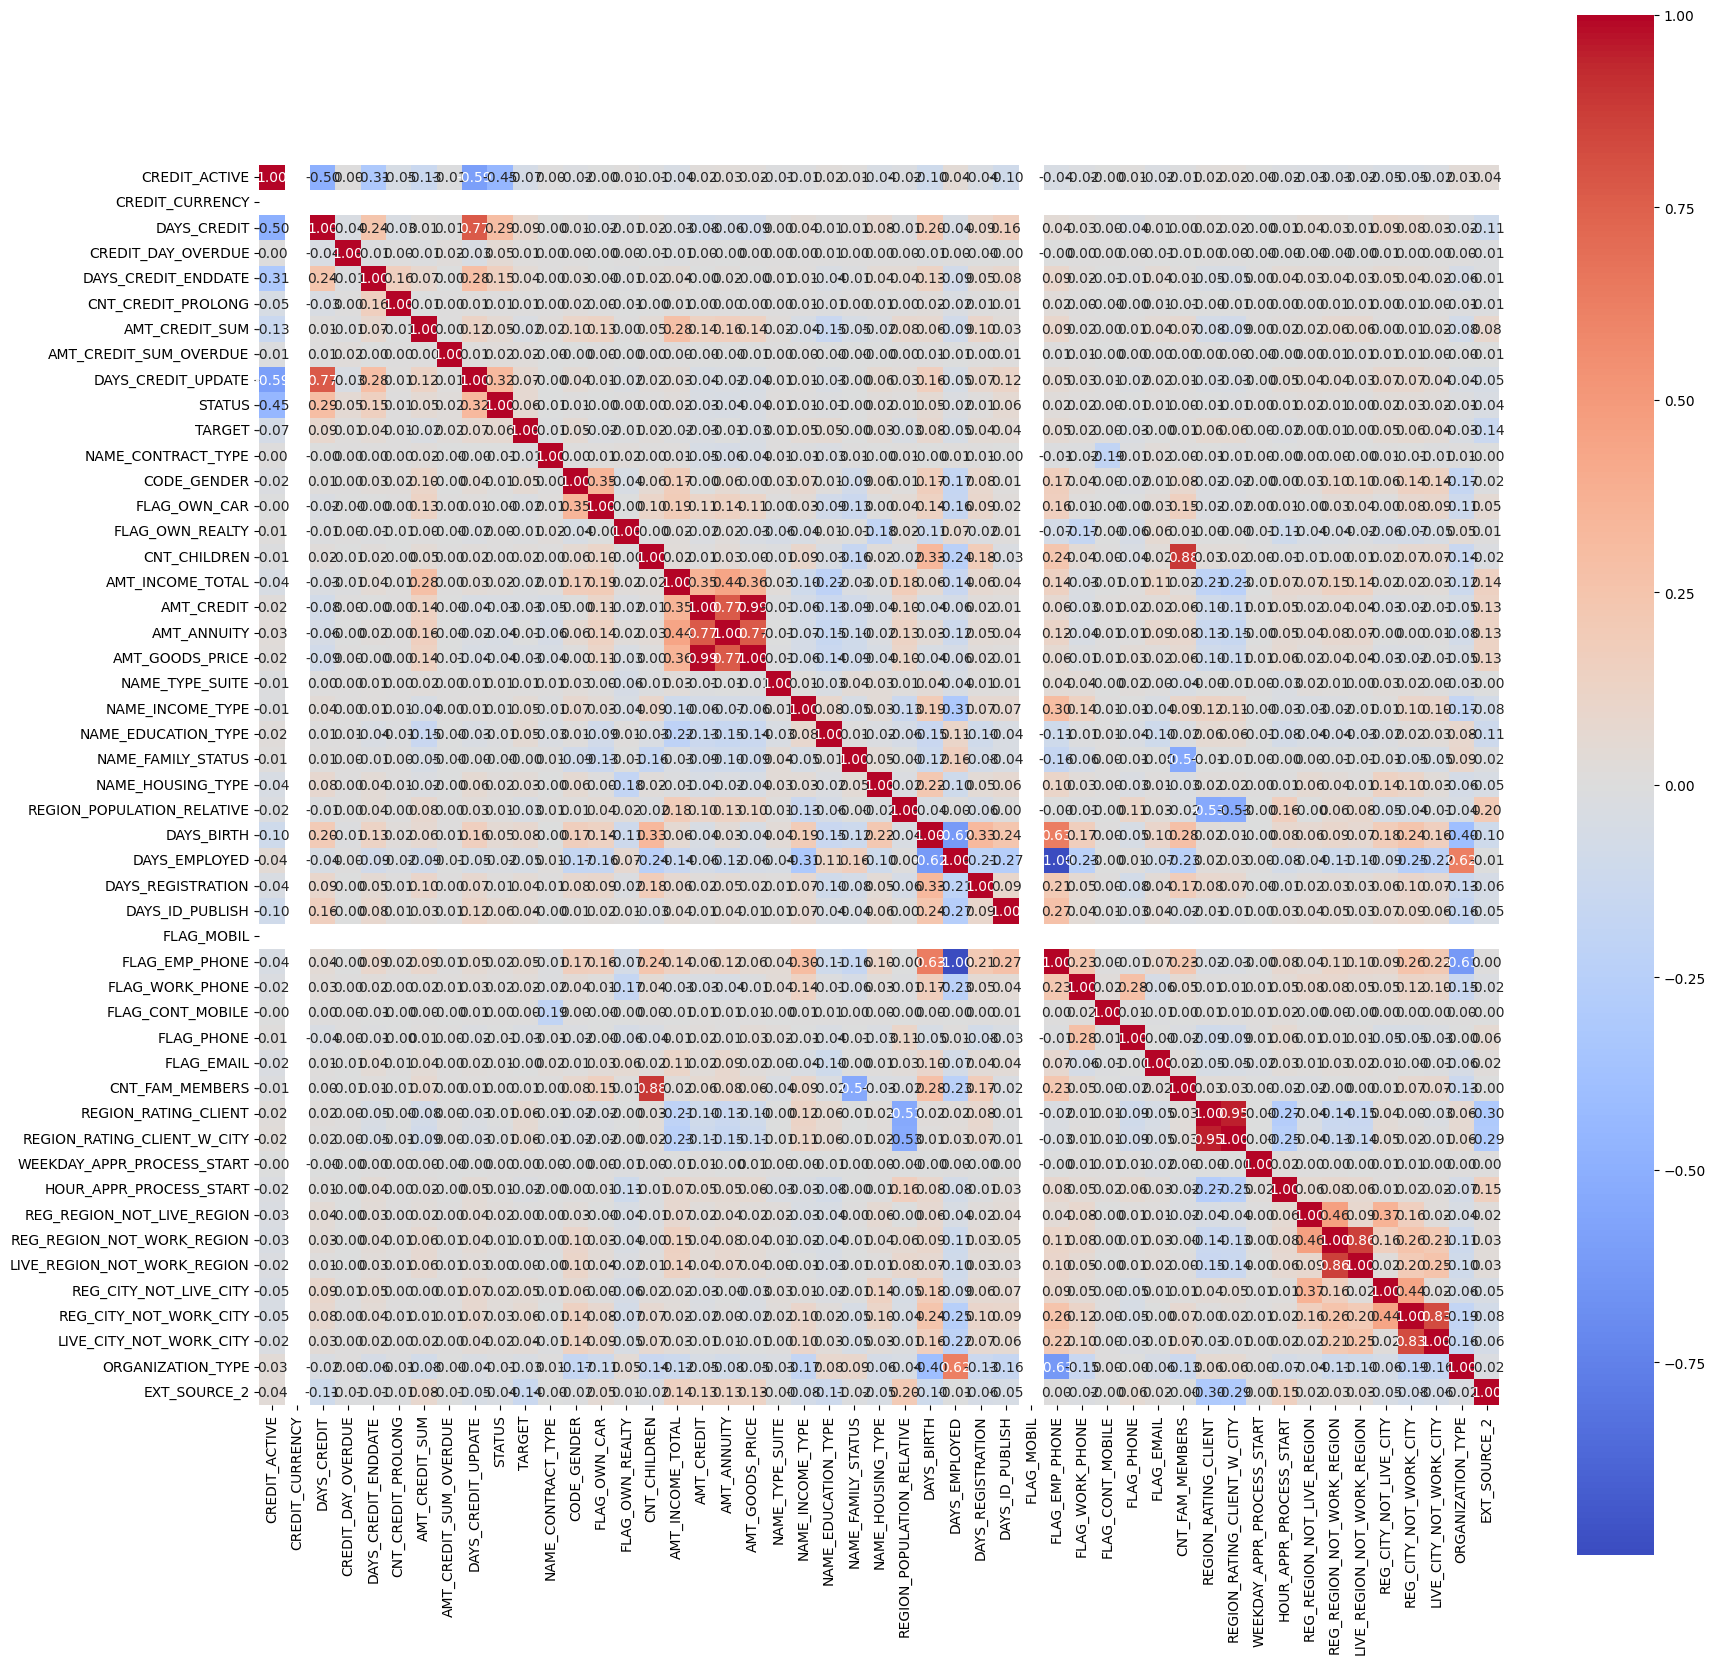

In [ ]:
correlation_matrix = df_merged_1.corr()

plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

### Brute force for previous data

In [167]:
train_and_evaluate_model_smote(df_merged_3)

KeyboardInterrupt: 

In [ ]:
columns = [col for col in df_merged_3.columns if col not in [ 'TARGET']]

# Duyệt qua từng cột và tạo df_new cho mỗi cột
for column in columns:
    df_new = df_merged_3[[ 'TARGET', column]]
    print(f"'Add:' {column}")
    train_and_evaluate_model_smote(df_new)

'Add:' NAME_CONTRACT_TYPE
GradientBoosting Model Accuracy: 51.66%
GradientBoosting Model - Precision: 8.58%
GradientBoosting Model - Recall: 51.64%
GradientBoosting Model - F1 Score: 14.71%
XGBoost Model Accuracy: 66.67%
XGBoost Model - Precision: 8.96%
XGBoost Model - Recall: 34.18%
XGBoost Model - F1 Score: 14.20%
'Add:' AMT_APPLICATION
GradientBoosting Model Accuracy: 50.81%
GradientBoosting Model - Precision: 8.63%
GradientBoosting Model - Recall: 53.15%
GradientBoosting Model - F1 Score: 14.85%
XGBoost Model Accuracy: 52.23%
XGBoost Model - Precision: 8.67%
XGBoost Model - Recall: 51.58%
XGBoost Model - F1 Score: 14.85%
'Add:' AMT_CREDIT
GradientBoosting Model Accuracy: 50.21%
GradientBoosting Model - Precision: 8.43%
GradientBoosting Model - Recall: 52.39%
GradientBoosting Model - F1 Score: 14.52%
XGBoost Model Accuracy: 53.68%
XGBoost Model - Precision: 8.52%
XGBoost Model - Recall: 48.66%
XGBoost Model - F1 Score: 14.50%
'Add:' WEEKDAY_APPR_PROCESS_START
GradientBoosting Model 

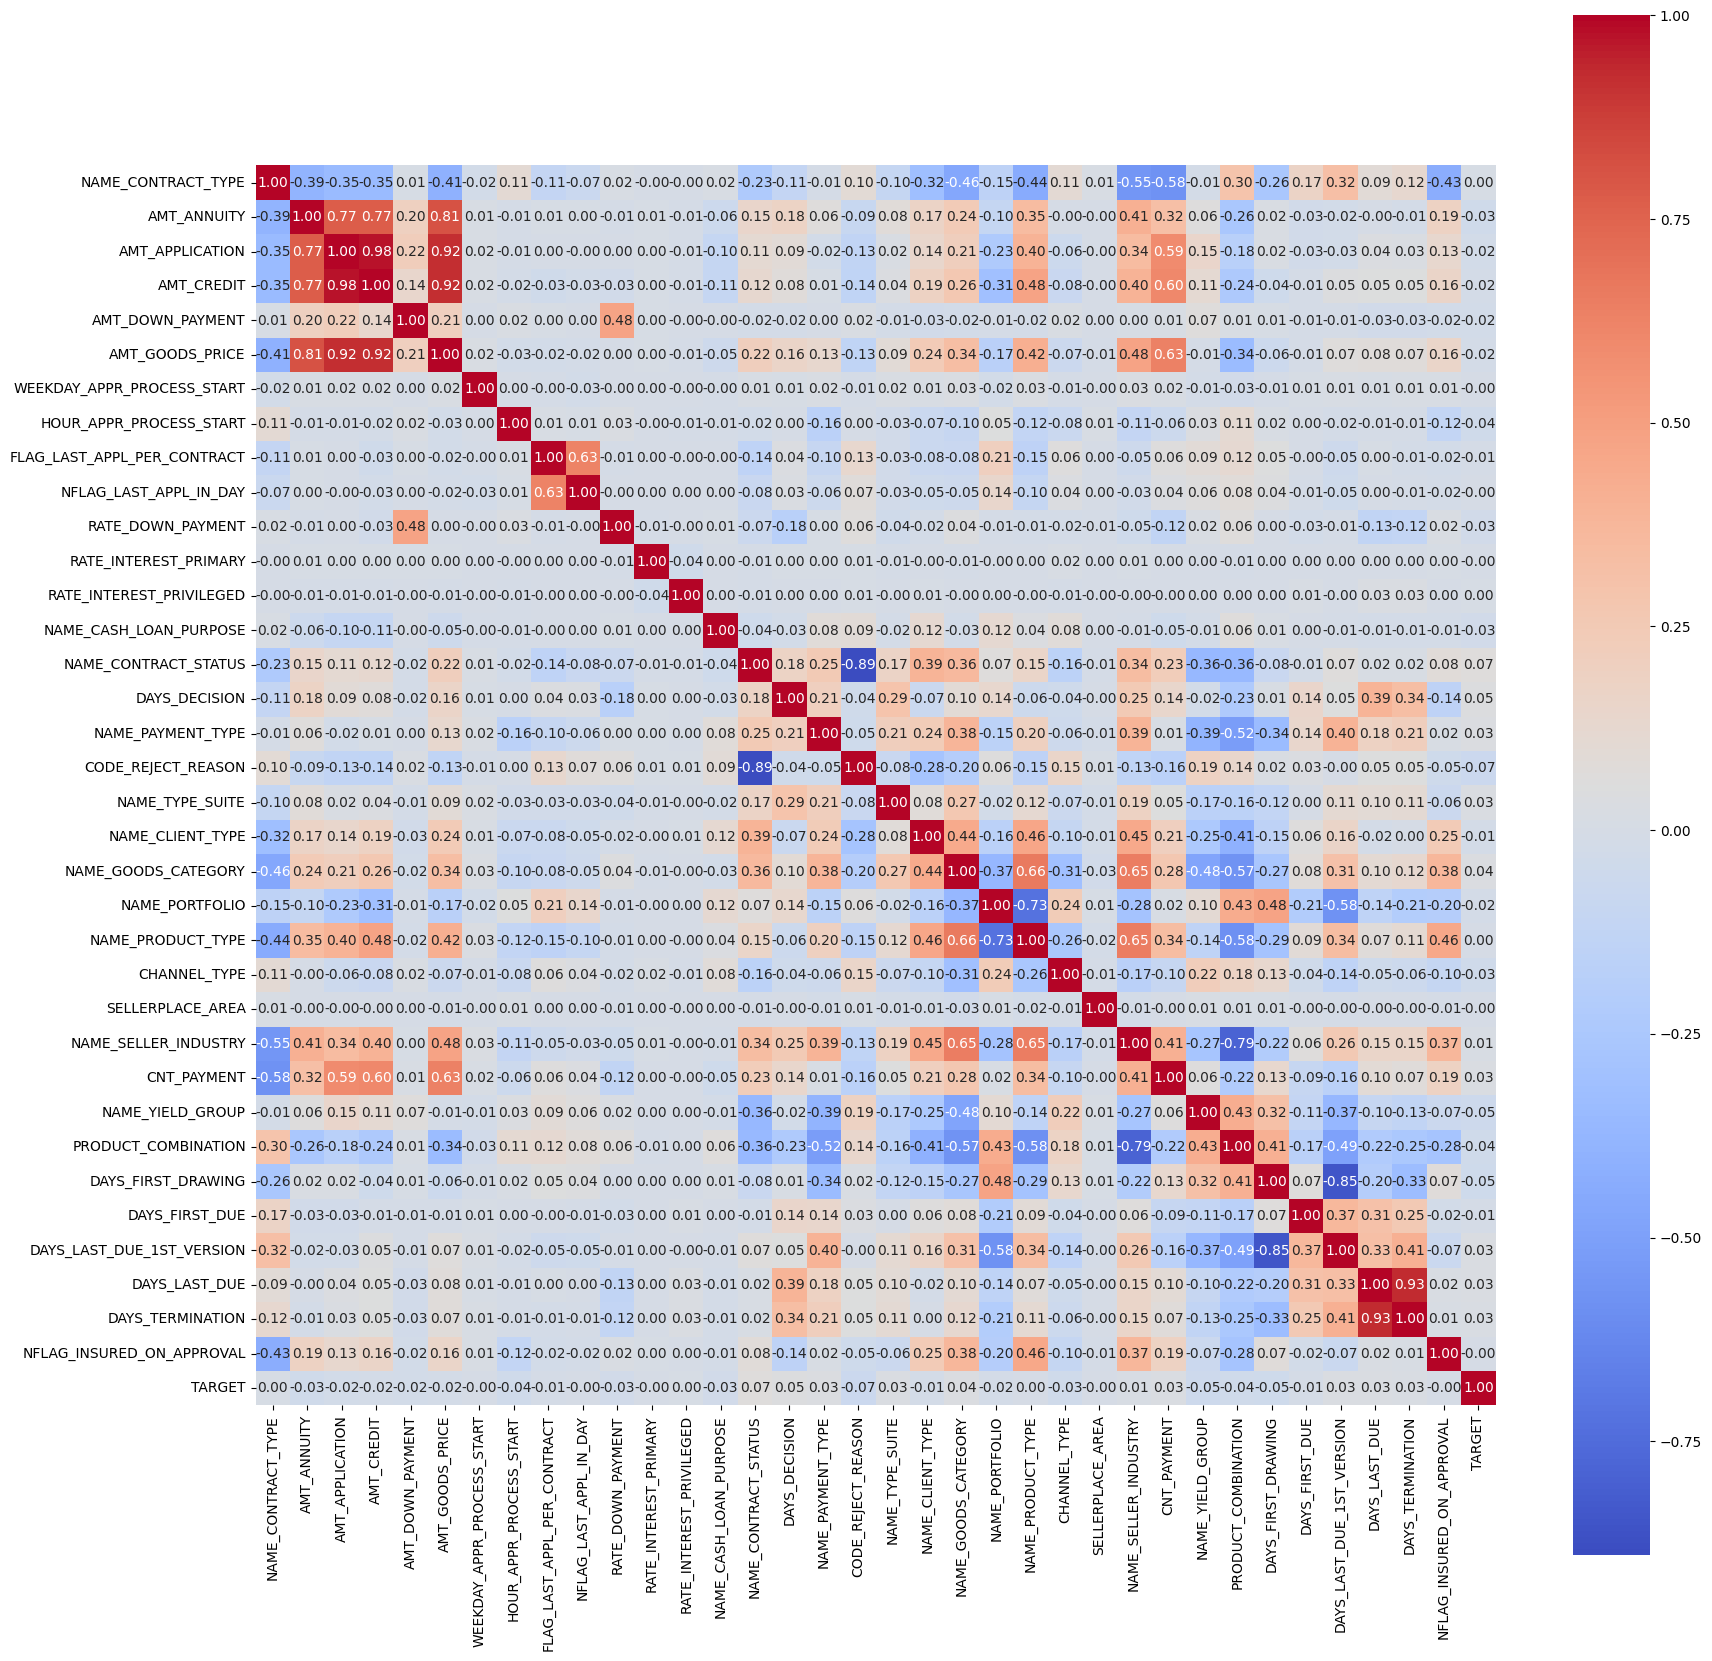

In [ ]:
correlation_matrix = df_merged_3.corr()

plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [ ]:
train_and_evaluate_model_smote(df_merged_4)

GradientBoosting Model Accuracy: 62.16%
GradientBoosting Model - Precision: 10.25%
GradientBoosting Model - Recall: 47.57%
GradientBoosting Model - F1 Score: 16.87%
XGBoost Model Accuracy: 69.90%
XGBoost Model - Precision: 9.55%
XGBoost Model - Recall: 32.21%
XGBoost Model - F1 Score: 14.73%


In [ ]:
columns = [col for col in df_merged_4.columns if col not in [ 'TARGET']]

# Duyệt qua từng cột và tạo df_new cho mỗi cột
for column in columns:
    df_new = df_merged_4[[ 'TARGET', column]]
    print(f"'Add:' {column}")
    train_and_evaluate_model_smote(df_new)

'Add:' MONTHS_BALANCE
GradientBoosting Model Accuracy: 57.32%
GradientBoosting Model - Precision: 9.58%
GradientBoosting Model - Recall: 50.82%
GradientBoosting Model - F1 Score: 16.12%
XGBoost Model Accuracy: 58.10%
XGBoost Model - Precision: 9.48%
XGBoost Model - Recall: 48.98%
XGBoost Model - F1 Score: 15.88%
'Add:' CNT_INSTALMENT
GradientBoosting Model Accuracy: 64.04%
GradientBoosting Model - Precision: 9.54%
GradientBoosting Model - Recall: 40.70%
GradientBoosting Model - F1 Score: 15.45%
XGBoost Model Accuracy: 51.58%
XGBoost Model - Precision: 9.22%
XGBoost Model - Recall: 56.50%
XGBoost Model - F1 Score: 15.85%
'Add:' CNT_INSTALMENT_FUTURE
GradientBoosting Model Accuracy: 74.54%
GradientBoosting Model - Precision: 9.86%
GradientBoosting Model - Recall: 26.45%
GradientBoosting Model - F1 Score: 14.36%
XGBoost Model Accuracy: 52.35%
XGBoost Model - Precision: 9.17%
XGBoost Model - Recall: 55.07%
XGBoost Model - F1 Score: 15.73%
'Add:' NAME_CONTRACT_STATUS
GradientBoosting Model 

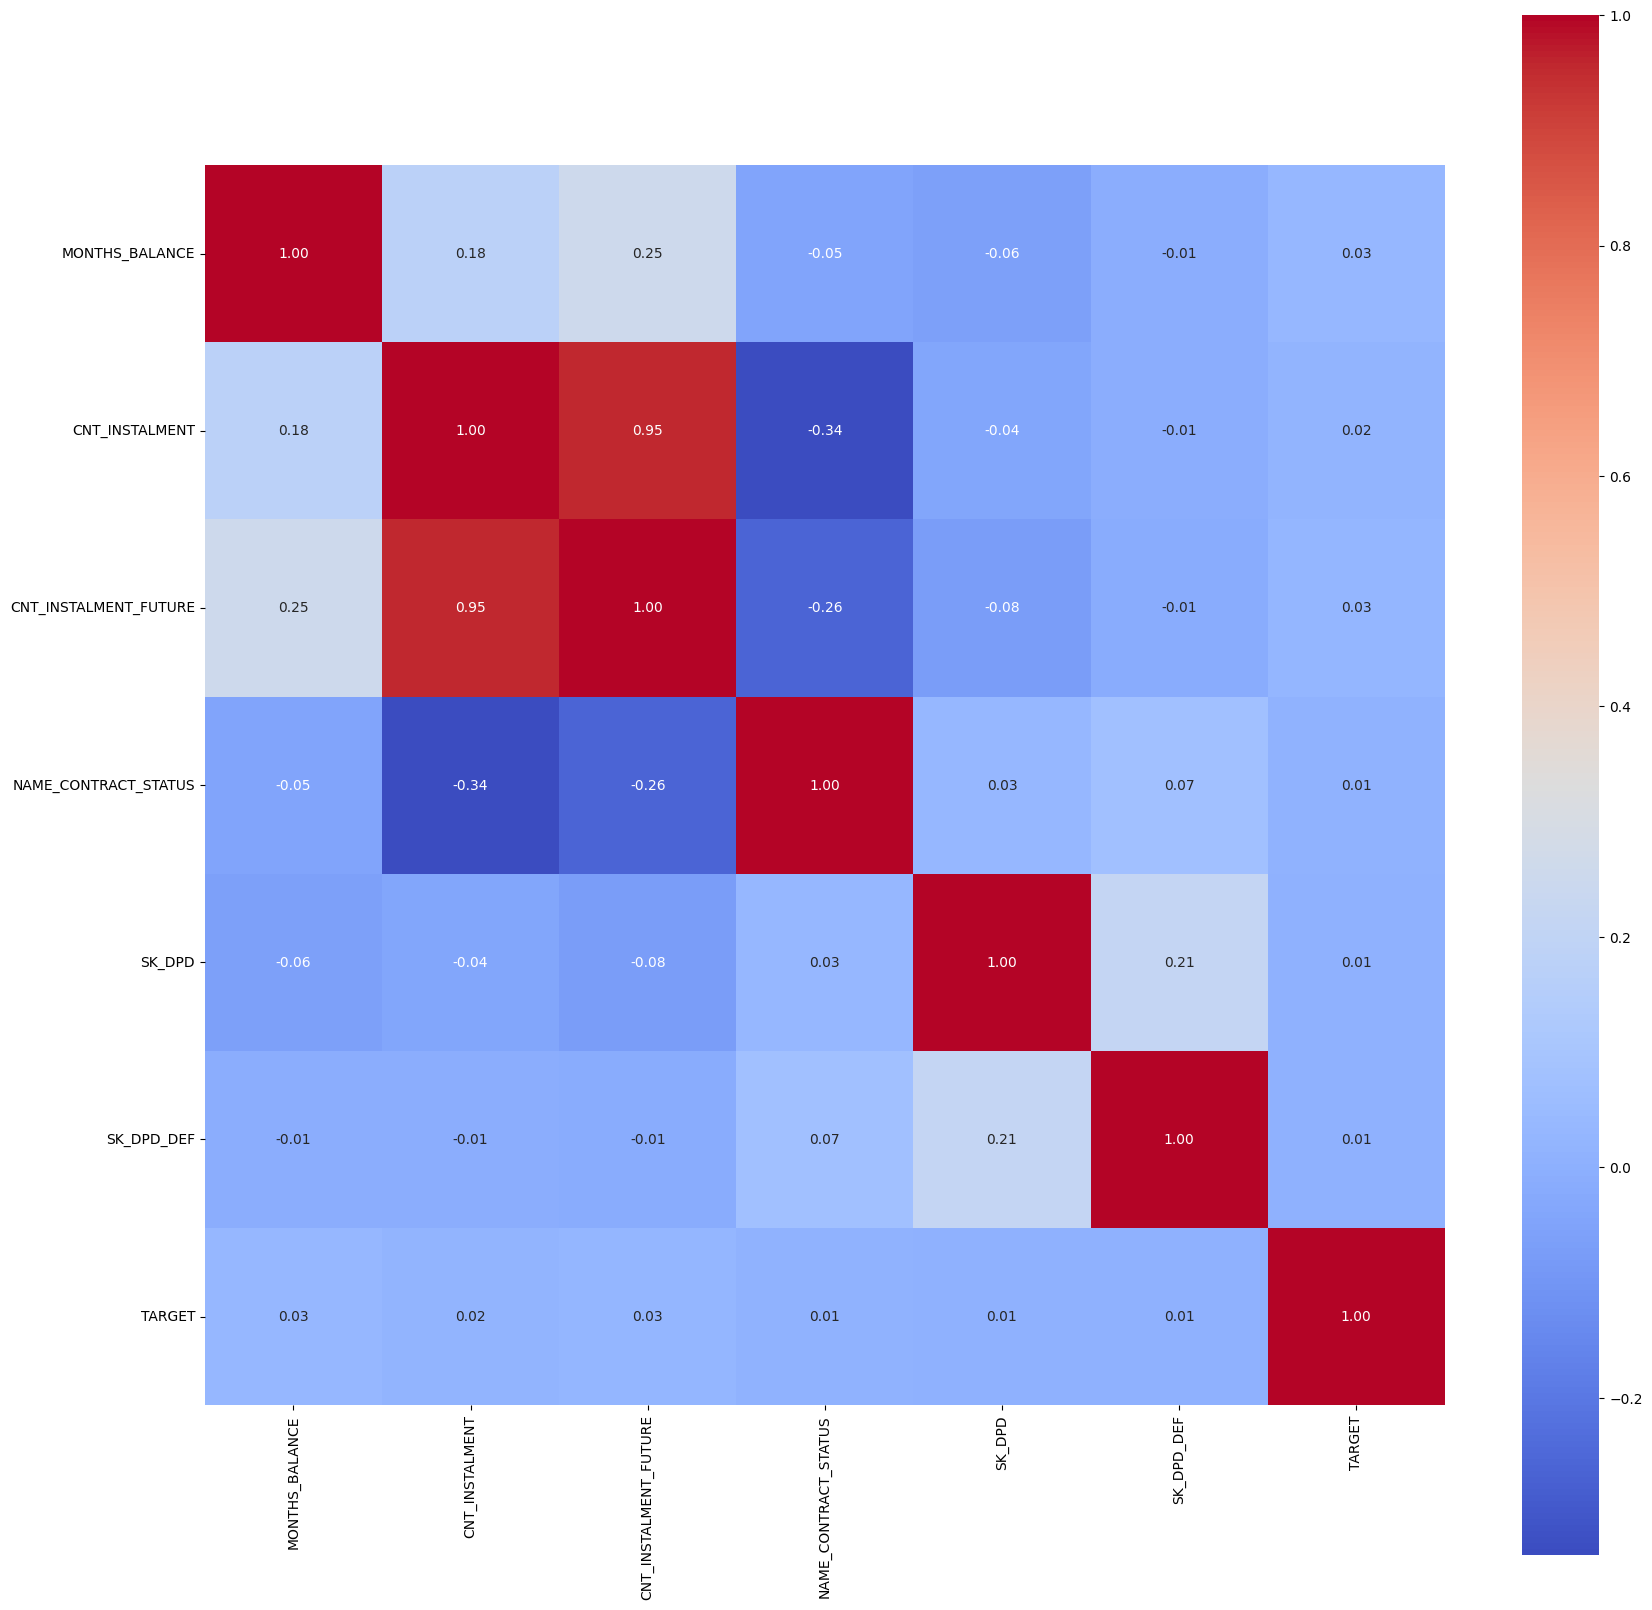

In [ ]:
correlation_matrix = df_merged_4.corr()

plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

In [ ]:
train_and_evaluate_model_smote(df_merged_5)

GradientBoosting Model Accuracy: 85.22%
GradientBoosting Model - Precision: 12.21%
GradientBoosting Model - Recall: 13.41%
GradientBoosting Model - F1 Score: 12.78%
XGBoost Model Accuracy: 88.38%
XGBoost Model - Precision: 14.39%
XGBoost Model - Recall: 8.88%
XGBoost Model - F1 Score: 10.99%


In [ ]:
columns = [col for col in df_merged_5.columns if col not in [ 'TARGET']]

# Duyệt qua từng cột và tạo df_new cho mỗi cột
for column in columns:
    df_new = df_merged_5[[ 'TARGET', column]]
    print(f"'Add:' {column}")
    train_and_evaluate_model_smote(df_new)

'Add:' MONTHS_BALANCE
GradientBoosting Model Accuracy: 79.51%
GradientBoosting Model - Precision: 10.36%
GradientBoosting Model - Recall: 20.10%
GradientBoosting Model - F1 Score: 13.67%
XGBoost Model Accuracy: 78.17%
XGBoost Model - Precision: 10.08%
XGBoost Model - Recall: 21.51%
XGBoost Model - F1 Score: 13.73%
'Add:' AMT_BALANCE
GradientBoosting Model Accuracy: 81.71%
GradientBoosting Model - Precision: 11.31%
GradientBoosting Model - Recall: 18.51%
GradientBoosting Model - F1 Score: 14.04%
XGBoost Model Accuracy: 81.80%
XGBoost Model - Precision: 11.29%
XGBoost Model - Recall: 18.29%
XGBoost Model - F1 Score: 13.96%
'Add:' AMT_CREDIT_LIMIT_ACTUAL
GradientBoosting Model Accuracy: 72.83%
GradientBoosting Model - Precision: 9.14%
GradientBoosting Model - Recall: 26.47%
GradientBoosting Model - F1 Score: 13.59%
XGBoost Model Accuracy: 75.79%
XGBoost Model - Precision: 9.09%
XGBoost Model - Recall: 22.22%
XGBoost Model - F1 Score: 12.91%
'Add:' AMT_DRAWINGS_ATM_CURRENT
GradientBoosting

In [165]:
train_and_evaluate_model_smote(df_merged_6)

GradientBoosting Model Accuracy: 79.75%
GradientBoosting Model - Precision: 11.58%
GradientBoosting Model - Recall: 22.20%
GradientBoosting Model - F1 Score: 15.22%
XGBoost Model Accuracy: 72.14%
XGBoost Model - Precision: 10.42%
XGBoost Model - Recall: 31.62%
XGBoost Model - F1 Score: 15.67%


In [166]:
columns = [col for col in df_merged_6.columns if col not in [ 'TARGET']]

# Duyệt qua từng cột và tạo df_new cho mỗi cột
for column in columns:
    df_new = df_merged_6[[ 'TARGET', column]]
    print(f"'Add:' {column}")
    train_and_evaluate_model_smote(df_new)

'Add:' NUM_INSTALMENT_VERSION
GradientBoosting Model Accuracy: 54.93%
GradientBoosting Model - Precision: 9.29%
GradientBoosting Model - Recall: 51.41%
GradientBoosting Model - F1 Score: 15.74%
XGBoost Model Accuracy: 42.32%
XGBoost Model - Precision: 8.91%
XGBoost Model - Recall: 65.51%
XGBoost Model - F1 Score: 15.68%
'Add:' NUM_INSTALMENT_NUMBER
GradientBoosting Model Accuracy: 56.16%
GradientBoosting Model - Precision: 8.61%
GradientBoosting Model - Recall: 45.32%
GradientBoosting Model - F1 Score: 14.48%
XGBoost Model Accuracy: 54.45%
XGBoost Model - Precision: 9.02%
XGBoost Model - Recall: 50.20%
XGBoost Model - F1 Score: 15.29%
'Add:' DAYS_INSTALMENT
GradientBoosting Model Accuracy: 50.98%
GradientBoosting Model - Precision: 9.49%
GradientBoosting Model - Recall: 58.39%
GradientBoosting Model - F1 Score: 16.32%
XGBoost Model Accuracy: 54.35%
XGBoost Model - Precision: 9.48%
XGBoost Model - Recall: 53.55%
XGBoost Model - F1 Score: 16.11%
'Add:' DAYS_ENTRY_PAYMENT
GradientBoosting

### Final

In [194]:
df_new_7 = df_final[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE', 'NFLAG_LAST_APPL_IN_DAY']]

In [190]:
train_and_evaluate_model_smote(df_new_7)

GradientBoosting Model Accuracy: 54.62%
GradientBoosting Model - Precision: 10.98%
GradientBoosting Model - Recall: 63.41%
GradientBoosting Model - F1 Score: 18.71%
XGBoost Model Accuracy: 54.72%
XGBoost Model - Precision: 10.67%
XGBoost Model - Recall: 60.98%
XGBoost Model - F1 Score: 18.16%


In [192]:
df_new_8 = df_final[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE', 'FLAG_LAST_APPL_PER_CONTRACT']]

In [193]:
train_and_evaluate_model_smote(df_new_8)

GradientBoosting Model Accuracy: 54.49%
GradientBoosting Model - Precision: 11.01%
GradientBoosting Model - Recall: 63.90%
GradientBoosting Model - F1 Score: 18.79%
XGBoost Model Accuracy: 54.82%
XGBoost Model - Precision: 10.73%
XGBoost Model - Recall: 61.25%
XGBoost Model - F1 Score: 18.26%


In [ ]:
df_new_9 = df_final_next[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE', 'NUM_INSTALMENT_VERSION']]


In [197]:
train_and_evaluate_model_smote(df_new_9)

GradientBoosting Model Accuracy: 51.90%
GradientBoosting Model - Precision: 10.41%
GradientBoosting Model - Recall: 63.74%
GradientBoosting Model - F1 Score: 17.90%
XGBoost Model Accuracy: 63.16%
XGBoost Model - Precision: 10.31%
XGBoost Model - Recall: 45.16%
XGBoost Model - F1 Score: 16.78%


In [199]:
df_new_10 = df_final_next[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE', 'DAYS_INSTALMENT']]

In [200]:
train_and_evaluate_model_smote(df_new_10)

GradientBoosting Model Accuracy: 44.91%
GradientBoosting Model - Precision: 8.62%
GradientBoosting Model - Recall: 59.36%
GradientBoosting Model - F1 Score: 15.06%
XGBoost Model Accuracy: 82.19%
XGBoost Model - Precision: 11.14%
XGBoost Model - Recall: 16.70%
XGBoost Model - F1 Score: 13.37%


In [ ]:
df_new_11 = df_final_next[['STATUS', 'TARGET','CODE_GENDER','FLAG_EMP_PHONE', 'DAYS_ENTRY_PAYMENT']]

In [205]:
train_and_evaluate_model_smote(df_new_11)

GradientBoosting Model Accuracy: 44.91%
GradientBoosting Model - Precision: 8.62%
GradientBoosting Model - Recall: 59.36%
GradientBoosting Model - F1 Score: 15.06%
XGBoost Model Accuracy: 81.98%
XGBoost Model - Precision: 10.84%
XGBoost Model - Recall: 16.49%
XGBoost Model - F1 Score: 13.08%


In [214]:
df_new_11.shape[0]

87355

# Final model

In [211]:
df_final = df_new_6
target_column='TARGET'

In [218]:
df_new_6

,STATUS,TARGET,CODE_GENDER,FLAG_EMP_PHONE
0,-0.750000,1,1,1
1,-1.000000,0,1,1
2,0.000000,0,1,1
3,0.000000,0,1,1
4,0.000000,0,1,1
...,...,...,...,...
90605,-0.954545,0,0,1
90606,-0.818182,0,0,1
90607,-0.750000,0,0,1
90608,-1.000000,1,0,1


In [212]:
test_size=0.2
random_state=42

In [213]:
x = df_final.drop(columns=[target_column])
y = df_final[target_column]

# Chia dữ liệu thành train và test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)

# Áp dụng SMOTE để oversample lớp thiểu số
smote = SMOTE(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Mô hình GradientBoosting
model_gb = GradientBoostingClassifier(learning_rate=0.01, random_state=random_state)
model_gb.fit(x_train_resampled, y_train_resampled)
acc_gb = model_gb.score(x_test, y_test)
print(f'GradientBoosting Model Accuracy: {acc_gb * 100:.2f}%')

# Dự đoán và tính toán các chỉ số cho GradientBoosting
y_pred_gb = model_gb.predict(x_test)
precision_gb = precision_score(y_test, y_pred_gb) * 100
recall_gb = recall_score(y_test, y_pred_gb) * 100
f1_gb = f1_score(y_test, y_pred_gb) * 100
print("GradientBoosting Model - Precision: {:.2f}%".format(precision_gb))
print("GradientBoosting Model - Recall: {:.2f}%".format(recall_gb))
print("GradientBoosting Model - F1 Score: {:.2f}%".format(f1_gb))
print("=====================================================")


# Mô hình XGBoost
model_xgb = xgb.XGBClassifier(random_state=random_state, n_estimators=100)
model_xgb.fit(x_train_resampled, y_train_resampled)
acc_xgb = model_xgb.score(x_test, y_test)
print(f'XGBoost Model Accuracy: {acc_xgb * 100:.2f}%')

# Dự đoán và tính toán các chỉ số cho XGBoost
y_pred_xgb = model_xgb.predict(x_test)
precision_xgb = precision_score(y_test, y_pred_xgb) * 100
recall_xgb = recall_score(y_test, y_pred_xgb) * 100
f1_xgb = f1_score(y_test, y_pred_xgb) * 100
print("XGBoost Model - Precision: {:.2f}%".format(precision_xgb))
print("XGBoost Model - Recall: {:.2f}%".format(recall_xgb))
print("XGBoost Model - F1 Score: {:.2f}%".format(f1_xgb))

GradientBoosting Model Accuracy: 49.56%
GradientBoosting Model - Precision: 10.31%
GradientBoosting Model - Recall: 67.41%
GradientBoosting Model - F1 Score: 17.88%
XGBoost Model Accuracy: 52.11%
XGBoost Model - Precision: 10.39%
XGBoost Model - Recall: 64.02%
XGBoost Model - F1 Score: 17.88%


In [219]:
importances = model_xgb.feature_importances_
feature_names =   'STATUS','CODE_GENDER','FLAG_EMP_PHONE'
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

          Feature  Importance
1     CODE_GENDER    0.350732
0          STATUS    0.328939
2  FLAG_EMP_PHONE    0.320330
